<img src='./img/logoline_12000.png' align='right' width='100%'></img>

<br>

# Climatologies and trends

<br>

### About

This notebook provides you a practical introduction to the topic of analysing climatologies and trends.

There are two practical case studies:


* [1 - Calculation of the global mean temperature anomaly](#global_mean)
* [2 - Seasonal variations of the global mean temperature over the Arctic](#arctic)

### Data

### Further resources

<br>

<hr>

### Load libraries

In [3]:
# CDS API
import cdsapi

# Libraries for working with multi-dimensional arrays
import numpy as np
import xarray as xr

# Libraries for plotting and visualising data
import matplotlib.path as mpath
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

<hr>

## <a id='global_mean'></a>1. Calculation of the global mean temperature anomaly

The example below will show you how you can use ERA-5 reanalysis data to analyse climatologies and trends of the global near-surface air temperature.

> **Data**: `ERA-5 monthly averaged data on single levels` <br>
> **Temporal coverage**: `Jan 1979 to Dec 2020` <br>
> **Spatial coverage**: `Global` <br>
> **Format**: `NetCDF`<br>
> **Retrieve request**: [CDS API request](./100_climate_data_store_intro.ipynb#era5_monthly)

### Load the dataset

The first step is to open the dataset with the function `open_dataset()` of the Python library [xarray](http://xarray.pydata.org/en/stable/). xarray is a Python library that makes the handling of multi-dimensional meteorological and climate data as well as `netCDF` data very efficient. The data file is available under the path: `./data/era5_monthly_t2m.nc`. 

The `open_dataset()` function returns a `xarray.Dataset` object, which can hold one or more `xarray.DataArray` objects, which are aligned on the same dimensions. The loaded `xarray.Dataset` has the following specifications: 
* three dimensions: `latitude`, `longitude` and `time` and
* 1 data variable: `t2m`

In [6]:
file = './data/era5_monthly_t2m.nc'

In [8]:
era5_t2m_ds = xr.open_dataset(file)
era5_t2m_ds

<xarray.Dataset>
Dimensions:    (latitude: 721, longitude: 1440, time: 504)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.25 359.5 359.75
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-12-01
Data variables:
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-09-16 13:01:32 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...

<br>

The next step is to load the data variable `t2m` as `xarray.DataArray` object. You can load a data variable from an `xarray.Dataset` by specifying the name of the data variable (`t2m`) in square brackets `[]`. A `xarray.DataArray` object is a labeled, multi-dimensional array. Below, you see additional `attributes` of the data variable, such as `units` and `long_name`.

In [9]:
era5_t2m_da = era5_t2m_ds['t2m']
era5_t2m_da

<xarray.DataArray 't2m' (time: 504, latitude: 721, longitude: 1440)>
[523272960 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.25 359.5 359.75
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-12-01
Attributes:
    units:      K
    long_name:  2 metre temperature

<br>

Now, let us visualize one time step to get a better idea of the data.

In [10]:
def visualize_pcolormesh(data_array, longitude, latitude, projection, color_scale, unit, long_name, vmin, vmax, 
                         set_global=True, lonmin=-180, lonmax=180, latmin=-90, latmax=90):
    """ 
    Visualizes a xarray.DataArray with matplotlib's pcolormesh function.
    
    Parameters:
        data_array(xarray.DataArray): xarray.DataArray holding the data values
        longitude(xarray.DataArray): xarray.DataArray holding the longitude values
        latitude(xarray.DataArray): xarray.DataArray holding the latitude values
        projection(str): a projection provided by the cartopy library, e.g. ccrs.PlateCarree()
        color_scale(str): string taken from matplotlib's color ramp reference
        unit(str): the unit of the parameter, taken from the NetCDF file if possible
        long_name(str): long name of the parameter, taken from the NetCDF file if possible
        vmin(int): minimum number on visualisation legend
        vmax(int): maximum number on visualisation legend
        set_global(boolean): optional kwarg, default is True
        lonmin,lonmax,latmin,latmax(float): optional kwarg, set geographic extent is set_global kwarg is set to 
                                            False

    """
    fig=plt.figure(figsize=(20, 10))

    ax = plt.axes(projection=projection)
   
    img = plt.pcolormesh(longitude, latitude, data_array, 
                        cmap=plt.get_cmap(color_scale), transform=ccrs.PlateCarree(),
                        vmin=vmin,
                        vmax=vmax,
                        shading='auto')

    ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=1)
    ax.add_feature(cfeature.COASTLINE, edgecolor='black', linewidth=1)

    if (projection==ccrs.PlateCarree()):
        ax.set_extent([lonmin, lonmax, latmin, latmax], projection)
        gl = ax.gridlines(draw_labels=True, linestyle='--')
        gl.top_labels=False
        gl.right_labels=False
        gl.xformatter=LONGITUDE_FORMATTER
        gl.yformatter=LATITUDE_FORMATTER
        gl.xlabel_style={'size':14}
        gl.ylabel_style={'size':14}

    if(set_global):
        ax.set_global()
        ax.gridlines()

    cbar = fig.colorbar(img, ax=ax, orientation='horizontal', fraction=0.04, pad=0.1)
    cbar.set_label(unit, fontsize=16)
    cbar.ax.tick_params(labelsize=14)
    ax.set_title(long_name, fontsize=20, pad=20.0)

 #   plt.show()
    return fig, ax

In [36]:
str(era5_t2m_da[0,:,:].time.data)[0:7]

'1979-01'

(<Figure size 1440x720 with 2 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7fe94f7356a0>)

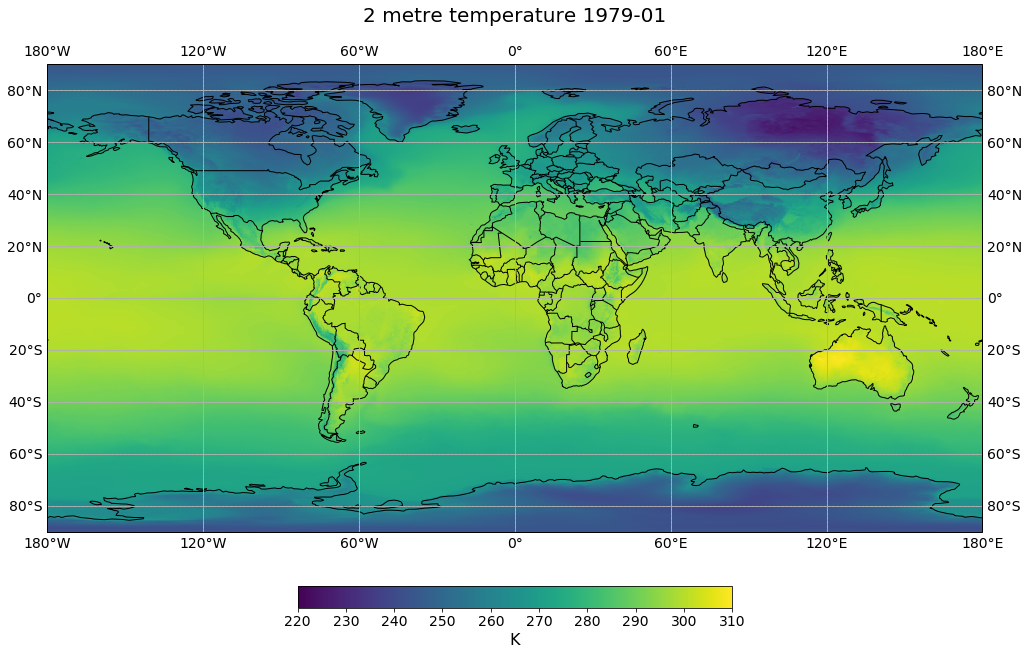

In [38]:
visualize_pcolormesh(data_array = era5_t2m_da[0,:,:],
                    longitude = era5_t2m_da.longitude,
                    latitude = era5_t2m_da.latitude,
                    projection = ccrs.PlateCarree(),
                    color_scale = 'viridis',
                    unit = era5_t2m_da.units,
                    long_name = era5_t2m_da.long_name + ' ' + str(era5_t2m_da[0,:,:].time.data)[0:7] + '\n',
                    vmin = 220,
                    vmax = 310)

## <a id='view_plot'></a>3. View and plot data

Now the fun part begins! Once our data is in the right format, there is no limit to what we can do with it! For example we can finally visualise the data to see what information it can provide.

#### View temporal mean for reference period

We will begin by creating a variable with the yearly means. Then we will extract the mean value for each geographic latitude and longitude for the period from 1981 to 2010. We will use this as a **reference period** with which to calculate **anomalies**.

Create a variable with the yearly means:

In [23]:
yearly_mean = da.groupby('time.year').mean('time')

Calculate mean temperature for a reference period of 1981 to 2010:

In [24]:
ref = yearly_mean.where((yearly_mean.year > 1980) & (yearly_mean.year < 2011), drop=True)
ref_mean = ref.mean(dim="year")

Let us plot this to see how the mean temperature for this period varies globally:

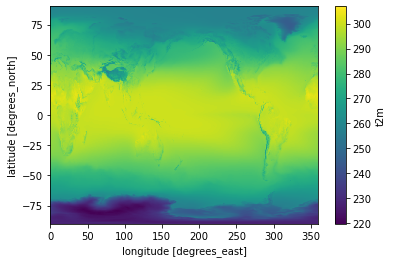

In [25]:
ref_mean.plot()

Notice the strong latitude gradient, and cold regions such as the Tibetan and Andean Plateaus and Greenland.

#### Plot global anomalies

We will now plot a global time series of annual temperature anomalies, defined as deviations in temperature from the reference mean.

Calculate the global mean for the reference period (1981 to 2010), and for the annual data from 1979 to 2019:

In [26]:
# global mean for reference period
ref_global = ref_mean.mean(["longitude", "latitude"])

# global mean for annual data
yearly_mean_global = yearly_mean.mean(["longitude", "latitude"])

We can now derive the anomalies by subtracting the global mean for the reference period from the annual means:

In [27]:
anomalies_global = yearly_mean_global - ref_global

Let's plot the annual global temperature anomalies over time, to see if there are any trends.

In [28]:
# Create a dashed horizontal line to show where the reference temperature lies
mean_line = xr.DataArray(0.0, coords=[('year', np.arange(1981,2010))])

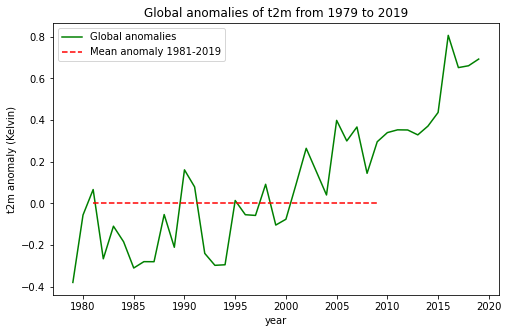

In [29]:
# Create the figure panel 
fig = plt.figure(figsize=(8,5))

# Create the plot within the figure
ax = plt.subplot()

# Set the axes labels and title of plot
ax.set_ylabel('t2m anomaly (Kelvin)')
ax.set_xlabel('year')
ax.set_title('Global anomalies of t2m from 1979 to 2019')

# Plot the data
ax.plot(anomalies_global.year, anomalies_global, color='green', label='Global anomalies')
ax.plot(mean_line.year, mean_line, color='red', linestyle='dashed', label='Mean anomaly 1981-2019')

# Define the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

Notice a clear trend in global temperature!

<hr>

In this tutorial we will access data from the Climate Data Store (CDS) of the Copernicus Climate Change Service (C3S), and analyse climatologies and trends in near-surface air temperature. The tutorial comprises the following steps:

1. [Search and download](#search_download) data using the CDS API: We will focus on ERA5 reanalysis data of 2 metre (near-surface) temperature.
2. [Read data](#read_data): Once downloaded, we will read and understand the data, including its variables and coordinates.
3. [View and plot data](#view_plot): We will see how the mean temperature varies globally, and how the Earth is warming by plotting time-series of global anomalies.
4. [Analyse data](#analyse_data) over the Arctic: We will focus on a subset over the Arctic and compare the rate of warming between seasons.

<img src='./img/map_1month_anomaly_Global_ea_2t_202010_title.jpg' align='center' width='100%'></img>

## <a id='read_data'></a>2. Read Data

Now that we have downloaded the data, we can start to play ...

We have requested the data in NetCDF format. This is a commonly used format for array-oriented scientific data. 

To read and process this data we will make use of the Xarray library. Xarray is an open source project and Python package that makes working with labelled multi-dimensional arrays simple, efficient, and fun! We will read the data from our NetCDF file into an Xarray **"dataset"**

## <a id='analyse_data'></a>4. Analyse data over the Arctic
We will now focus our attention over the Arctic. Here we will repeat the analysis above for this subset area. In addition, we will compare variations in the mean temperature of different seasons throughout the time series.

#### Plot mean Arctic temperature

First we have to create a subset for the Arctic Circle (above lat 66°33'N, or 66.55 in decimal degrees)

In [30]:
arctic = da.where(da.latitude >= 66.55, drop=True)

Calculate mean 2 metre temperature in period 1979 to 2019:

In [31]:
arctic_mean_1979_to_2019 = arctic.mean(dim="time")

Now let's plot this data in a map projection that facilitates visualisation of the Arctic:

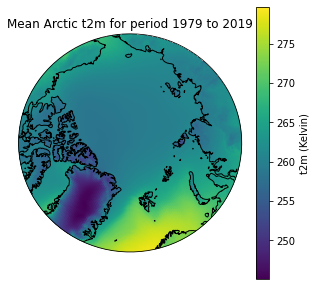

In [32]:
# create the figure panel 
fig = plt.figure(figsize=(5,5))
# create the map using the cartopy Orthographic projection, selecting the North Pole
ax = plt.subplot(1,1,1, projection=ccrs.Orthographic(central_latitude=90.0))
# add coastlines
ax.coastlines()
# compute a circle in axes coordinates, which we can use as a boundary for the map.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
# set boundary
ax.set_extent([-180,180, 66.55,90], crs=ccrs.PlateCarree())
ax.set_boundary(circle, transform=ax.transAxes)
# provide a title
ax.set_title('Mean Arctic t2m for period 1979 to 2019')
# plot t2m
pp = plt.pcolormesh(arctic_mean_1979_to_2019.longitude, arctic_mean_1979_to_2019.latitude,
                    arctic_mean_1979_to_2019, cmap='viridis', transform=ccrs.PlateCarree())
# add colourbar
cbar = plt.colorbar(pp)
cbar.set_label(label='t2m (Kelvin)')

#### Plot monthly time series
Let's plot the monthly time series to see if we can identify any trends.

In [33]:
arctic_mean = arctic.mean(["longitude", "latitude"])

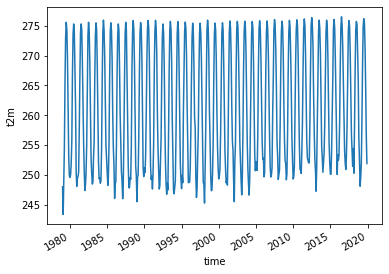

In [34]:
arctic_mean.plot()

Can you identify any global warming? The strong seasonal variations are evident throughout each year, but it is difficult to see any clear long-term trends.

#### Plot yearly time series
Now let's plot a time series of yearly averages. By removing the seasonal variations, perhaps we can identify some long-term trends.

In [35]:
arctic_yearly_mean = arctic_mean.groupby('time.year').mean('time')

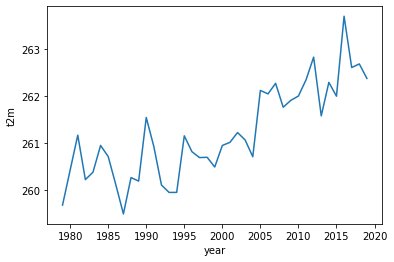

In [36]:
arctic_yearly_mean.plot()

Now we can clearly see a positive trend in warming throughout the time-series!

#### Plot seasonal time series

It may be interesting to compare trends in the mean temperature of different seasons throughout the time series. Do they vary? Are some seasons more constant over time, while others fluctuate?

In [37]:
# Create rolling average of three months
arctic_roll = arctic_mean.rolling(time=3, center=True).mean()

In [38]:
MAM = arctic_roll[3:-8:12] # MAM = March, April, May (Spring)
JJA = arctic_roll[6:-5:12] # JJA = June, July, August (Summer)
SON = arctic_roll[9:-2:12] # SON = September, October, November (Autumn)
DJF = arctic_roll[12:-11:12] # DJF = December, January, February (Winter)

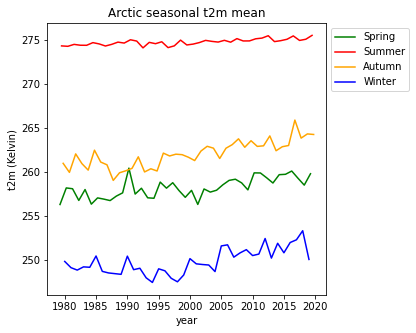

In [39]:
fig = plt.figure(figsize=(5,5))
ax = plt.subplot()
ax.set_ylabel('t2m (Kelvin)')
ax.set_xlabel('year')
ax.plot(MAM.time, MAM, color='green', label='Spring')
ax.plot(JJA.time, JJA, color='red', label='Summer')
ax.plot(SON.time, SON, color='orange', label='Autumn')
ax.plot(DJF.time, DJF, color='blue', label='Winter')
ax.set_title('Arctic seasonal t2m mean')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, bbox_to_anchor=(1, 1), loc='upper left')

Note the difference in variability of seasonal mean t2m throughout the time series: mean summer temperatures are more constant than in other seasons.